# Utledning av Cournot med python og sympy

Cournot-konkurranse vil si at to bedrifter konkurerer ved å fastsette hvor mye de skal produsere. Prisen er gitt ved etterspørselsfunksjonen.

Når bedriftene skal sette kvantum, må de ta hensyn til at eget kvantum endrer på prisen i det felles markedet. Dette kan tas hensyn til ved å definere pris i profittfunksjonen som en funksjon av totalt kvantum

Vi starter med å laste nødvendige pakker

In [2]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

Vi definerer så symbolene vi trenger. I Cournotkonkurranse fastsettes kvantum for bedrift 1 og 2, $Q_1$ og $Q_1$. Hver bedrift har marginalkostnader $mc_1$ og $mc_2$. Etterspørselsfunksjonen har et konstantledd $a$ og negativt stignignstall med absoluttverdi $b$. Vi definerer derfor følgende variabler for modellen:

In [12]:
Q1, Q2,mc1,mc2, a, b=symbols('Q1 Q2 mc1 mc2 a b')

Vi kan nå definere de to funksjonene vi skal bruke. Etterspørselsfunksjonen kan skrives som pris som funksjon av kvantum eller kvantum som funksjon av pris. I dette tilfellet bruker vi en prisfunksjon, slik at vi kan legge det inn i profittfunksjonen. 

Profitten er differansen mellom pris og marginakostnad, multiplisert med kvantum til den gjeldende bedriften. Denne profittfunksjonen gjelder for bette bedrifter, en må bare bytte om på kvantum og bruke riktig markginakostnad. 

In [4]:
def P_demand(Q,a,b):
    return a-b*Q

def profit(Q1,Q2,mc,a,b):
    return (P_demand(Q1+Q2,a,b)-mc)*Q1

## Løsning
Vi kan nå regne ut marginalinntekten som:

In [5]:
d_profit1_Q=diff(profit(Q1,Q2,mc1,a,b),Q1)
d_profit2_Q=diff(profit(Q2,Q1,mc2,a,b),Q2)

display(d_profit1_Q)
display(d_profit2_Q)

-Q1*b + a - b*(Q1 + Q2) - mc1

-Q2*b + a - b*(Q1 + Q2) - mc2

Førsteordensbetingelsen er at marginalinntekten er null. Vi løser og finner hvilke  $Q_1$ og $Q_1$ dette gjelder for:

In [8]:
sol=solve([d_profit1_Q,d_profit2_Q],[Q1,Q2])

display(sol[Q1])
display(sol[Q2])

(a - 2*mc1 + mc2)/(3*b)

(a + mc1 - 2*mc2)/(3*b)

Vi kan nå lage en funksjon som gir den nummeriske løsningen gitt nummeriske argumenter, for sympy-uttrykkene over. Vi bruker `lambdify`-funksjonen i `sympy` for å lage en slik funksjon:

In [13]:
cournot=lambdify(
    (a,b,mc1,mc2), 
    (sol[Q1],sol[Q2])
)

For eksempel kan vi regne ut at for $a=40$, $b=2$, $mc_1=5$ og $mc_2=10$ er kvantumene  $Q_1$ og $Q_1$ henholdsvis

In [11]:
cournot(40,2,5,10)

(6.666666666666666, 4.166666666666666)

## Responskurver

Responskruvene skal angi, i samme diagram, hvilke kvantum hver av bedriftene vil velge. For å få det i samme diagram, løser vi me hensyn til samme variabel, $Q_1$. Dermed blir $Q_1$ langs y-aksen mens $Q_2$ blir langs x-aksen. Vi bruker så `lamdyfy`-funksjonen fra `sympy` til å lage responsfunksjoner av `sympy`-uttrykk: 

In [17]:
R1=solve(foc1,Q1)
R2=solve(foc2,Q1)

R1=lambdify(
    (Q2,a,b,mc1), 
    R1[0]
)

R2=lambdify(
    (Q2,a,b,mc2), 
    R2[0]
)

display(R1(Q1,a,b,mc1))
display(R2(Q1,a,b,mc1))

(-0.5*Q1*b + 0.5*a - 0.5*mc1)/b

(-2*Q1*b + a - mc1)/b

## Anvendelse og figur

Vi kan nå anvende modellen på spesifikke parameter. Vi skal se på kvantum for bedrift 2 i intervallet 0 til 30, og ellers bruke følgende verdier på parameterne:

In [18]:
q = np.linspace(0,30,100)
a_value=40
b_value=1
mc1_value=10
mc2_value=10

Vi plotter på vanlig måte, og tar med en utregning til slutt som viser de mest interessante verdiene:

Løsningen er at 
bedrift 1 produserer 10.0 med profitt 100.0 og 
bedrift 2 produserer 10.0 med profitt 100.0
prisen blir 20.0


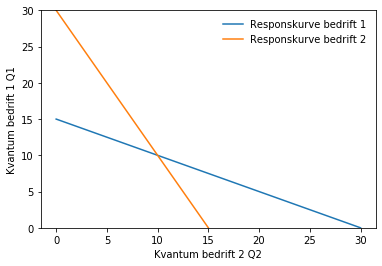

In [21]:


fig,ax=plt.subplots()
ax.set_ylabel('Kvantum bedrift 1 Q1')
ax.set_xlabel('Kvantum bedrift 2 Q2')


#drawing respons curves
ax.plot(q,
        R1(q,a_value,b_value,mc1_value),
        label='Responskurve bedrift 1'
       )

ax.plot(q,
        R2(q,a_value,b_value,mc2_value),
        label='Responskurve bedrift 2'
       )

#setting range for y-axis. 
plt.ylim((0,30))

#adding legend:
ax.legend(loc='upper right',frameon=False)

Q1sol, Q2sol=cournot(a_value,b_value,mc1_value,mc2_value)

print(f"""Løsningen er at 
bedrift 1 produserer {Q1sol} med profitt {profit(Q1sol,Q2sol,mc1_value,a_value,b_value)} og 
bedrift 2 produserer {Q2sol} med profitt {profit(Q2sol,Q1sol,mc2_value,a_value,b_value)}
prisen blir {P_demand(Q1sol+Q2sol,a_value,b_value)}""")